First check if all packages are installed and install them if they are not, import them after

In [3]:
!git clone https://github.com/fuzhong2021/mlflow-mall_customer-kmeans.git
import sys
import subprocess
import pkg_resources


required = {'pandas', 'numpy', 'matplotlib', 'mlflow', 'scikit-learn', 'jupyter', 'jupyterlab'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
    
sys.path.append('/content/mlflow-mall_customer-kmeans/abgabe/code')

import pandas as pd
import mlflow
import matplotlib.pyplot as plt
import train

import dataframe and use the split method again to get the X_test

In [4]:
#load dataset
data = pd.read_csv(r'/content/mlflow-mall_customer-kmeans/abgabe/data/out/clean_mall_customer.csv')

#split df and take X_test
X = train.split_df(data = data[['ageincome','spending_score']])[1]  

choose path for best model

In [1]:
logged_model = '/content/mlflow-mall_customer-kmeans/abgabe/code/mlruns/0/e0d9f16d8e23484d9da2bd17d50da92d/artifacts/model'

Load the best model and predict the test data, safe predictions in labels

In [5]:
model = mlflow.pyfunc.load_model(logged_model)
labels = model.predict(X)

Calculate and print metrics

In [6]:
metrics = train.metrics(X, labels)

print("---------------Metrics-----------------\n")
print("silhouette: " + str(metrics[0])+ "\n")
print("calinski_harabasz: " + str(metrics[1])+ "\n")
print("davies_bouldin: " + str(metrics[2])+ "\n")

---------------Metrics-----------------

silhouette: 0.4748112595089834

calinski_harabasz: 36.441485744014564

davies_bouldin: 0.5973536376356156



The results show that the prediction is even better than the results we had at the training process (see report).

At the training process, the calinski_harabasz index was 49.41, now it decreased to 36.44 which is not good.
Besides that the davies_boulden index decreased from 0,638 to 0.597 and the silhouette increased from 0.45 to 0.4748.

Now we are going to visualize the results.
For that, we can use a simple scatter plot to see the clustering.

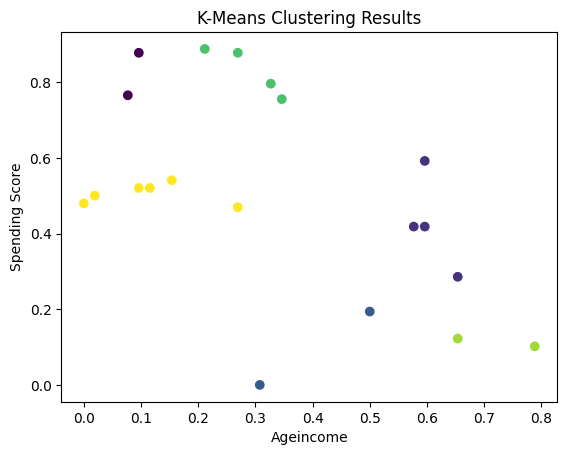

In [65]:

# Erstelle ein Scatter Plot mit x-Achse = "ageincome" und y-Achse = "spending_score"
plt.scatter(X["ageincome"], X["spending_score"], c=labels)

# Füge Legende und Achsenbeschriftungen hinzu
plt.xlabel("Ageincome")
plt.ylabel("Spending Score")
plt.title("K-Means Clustering Results")

# Zeige das Plot an
plt.show()

On the x-axis, we have the column 'ageincome' and on the y-axis, we have the column 'spending_score'. It's important to note that these values have been normalized using the MinMaxScaler, so they cannot be interpreted as absolute values. From the graph, it's clear that each cluster is separated from one another and is represented by a different color. While the clustering appears clean in the visualization, it doesn't necessarily mean that the results are accurate.